In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [2]:
correction, nameout, label = 'quantile-quantile', 'QQc', 'ISIMIP_QM'
# correction, nameout, label = 'linear-regression', 'LRc', 'Linear Regression'

print(f'Correction method: {correction}')

Correction method: quantile-quantile


In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
    ITALY = gpd.read_file(os.path.join(veneto_dir,'Italy_clear.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [4]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002
Tr = [5,  10,  20,  50, 100, 200]

In [5]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','6_DOWN_BCorrected')

In [6]:
pos = 3

In [7]:
dir_data = os.path.join(dir_base, f'ITALY_DOWN_IMERG_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}.nc')
DATA = xr.open_dataset(dir_data)

lon2dIM, lat2dIM = np.meshgrid(DATA.lon.values, DATA.lat.values)
Mev_dIMERG = DATA.Mev_d.values[pos]

In [8]:
dir_data = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}.nc')
DATA = xr.open_dataset(dir_data)

lon2dCM, lat2dCM = np.meshgrid(DATA.lon.values, DATA.lat.values)
Mev_dCMORPH = DATA.Mev_d.values[pos]

In [9]:
dir_data = os.path.join(dir_base, f'ITALY_DOWN_ERA5_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}.nc')
DATA = xr.open_dataset(dir_data)

lon2dER, lat2dER = np.meshgrid(DATA.lon.values, DATA.lat.values)
Mev_dERA5 = DATA.Mev_d.values[pos]

In [10]:
dir_data = os.path.join(dir_base, f'ITALY_DOWN_MSWEP_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}.nc')
DATA = xr.open_dataset(dir_data)

lon2dMS, lat2dMS = np.meshgrid(DATA.lon.values, DATA.lat.values)
Mev_dMSWEP = DATA.Mev_d.values[pos]

In [11]:
dir_data = os.path.join(dir_base, f'ITALY_DOWN_GSMaP_3h_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}.nc')
DATA = xr.open_dataset(dir_data)

lon2dGS, lat2dGS = np.meshgrid(DATA.lon.values, DATA.lat.values)
Mev_dGSMaP = DATA.Mev_d.values[pos]

In [12]:
dir_data = os.path.join(dir_base, f'ITALY_DOWN_CHIRPS_1dy_2002_2023_npix_2_thr_1_acf_mar_genetic_pearson_{nameout}.nc')
DATA = xr.open_dataset(dir_data)

lon2dCH, lat2dCH = np.meshgrid(DATA.lon.values, DATA.lat.values)
Mev_dCHIRPS = DATA.Mev_d.values[pos]

In [13]:
Mev_dIMERG = np.where(Mev_dIMERG>=400, 400, Mev_dIMERG)
Mev_dCMORPH = np.where(Mev_dCMORPH>=400, 400, Mev_dCMORPH)
Mev_dERA5 = np.where(Mev_dERA5>=400, 400, Mev_dERA5)
Mev_dMSWEP = np.where(Mev_dMSWEP>=400, 400, Mev_dMSWEP)
Mev_dGSMaP = np.where(Mev_dGSMaP>=400, 400, Mev_dGSMaP)
Mev_dCHIRPS = np.where(Mev_dCHIRPS>=400, 400, Mev_dCHIRPS)

Text(0.0, 1.0, '(f) dCHIRPS')

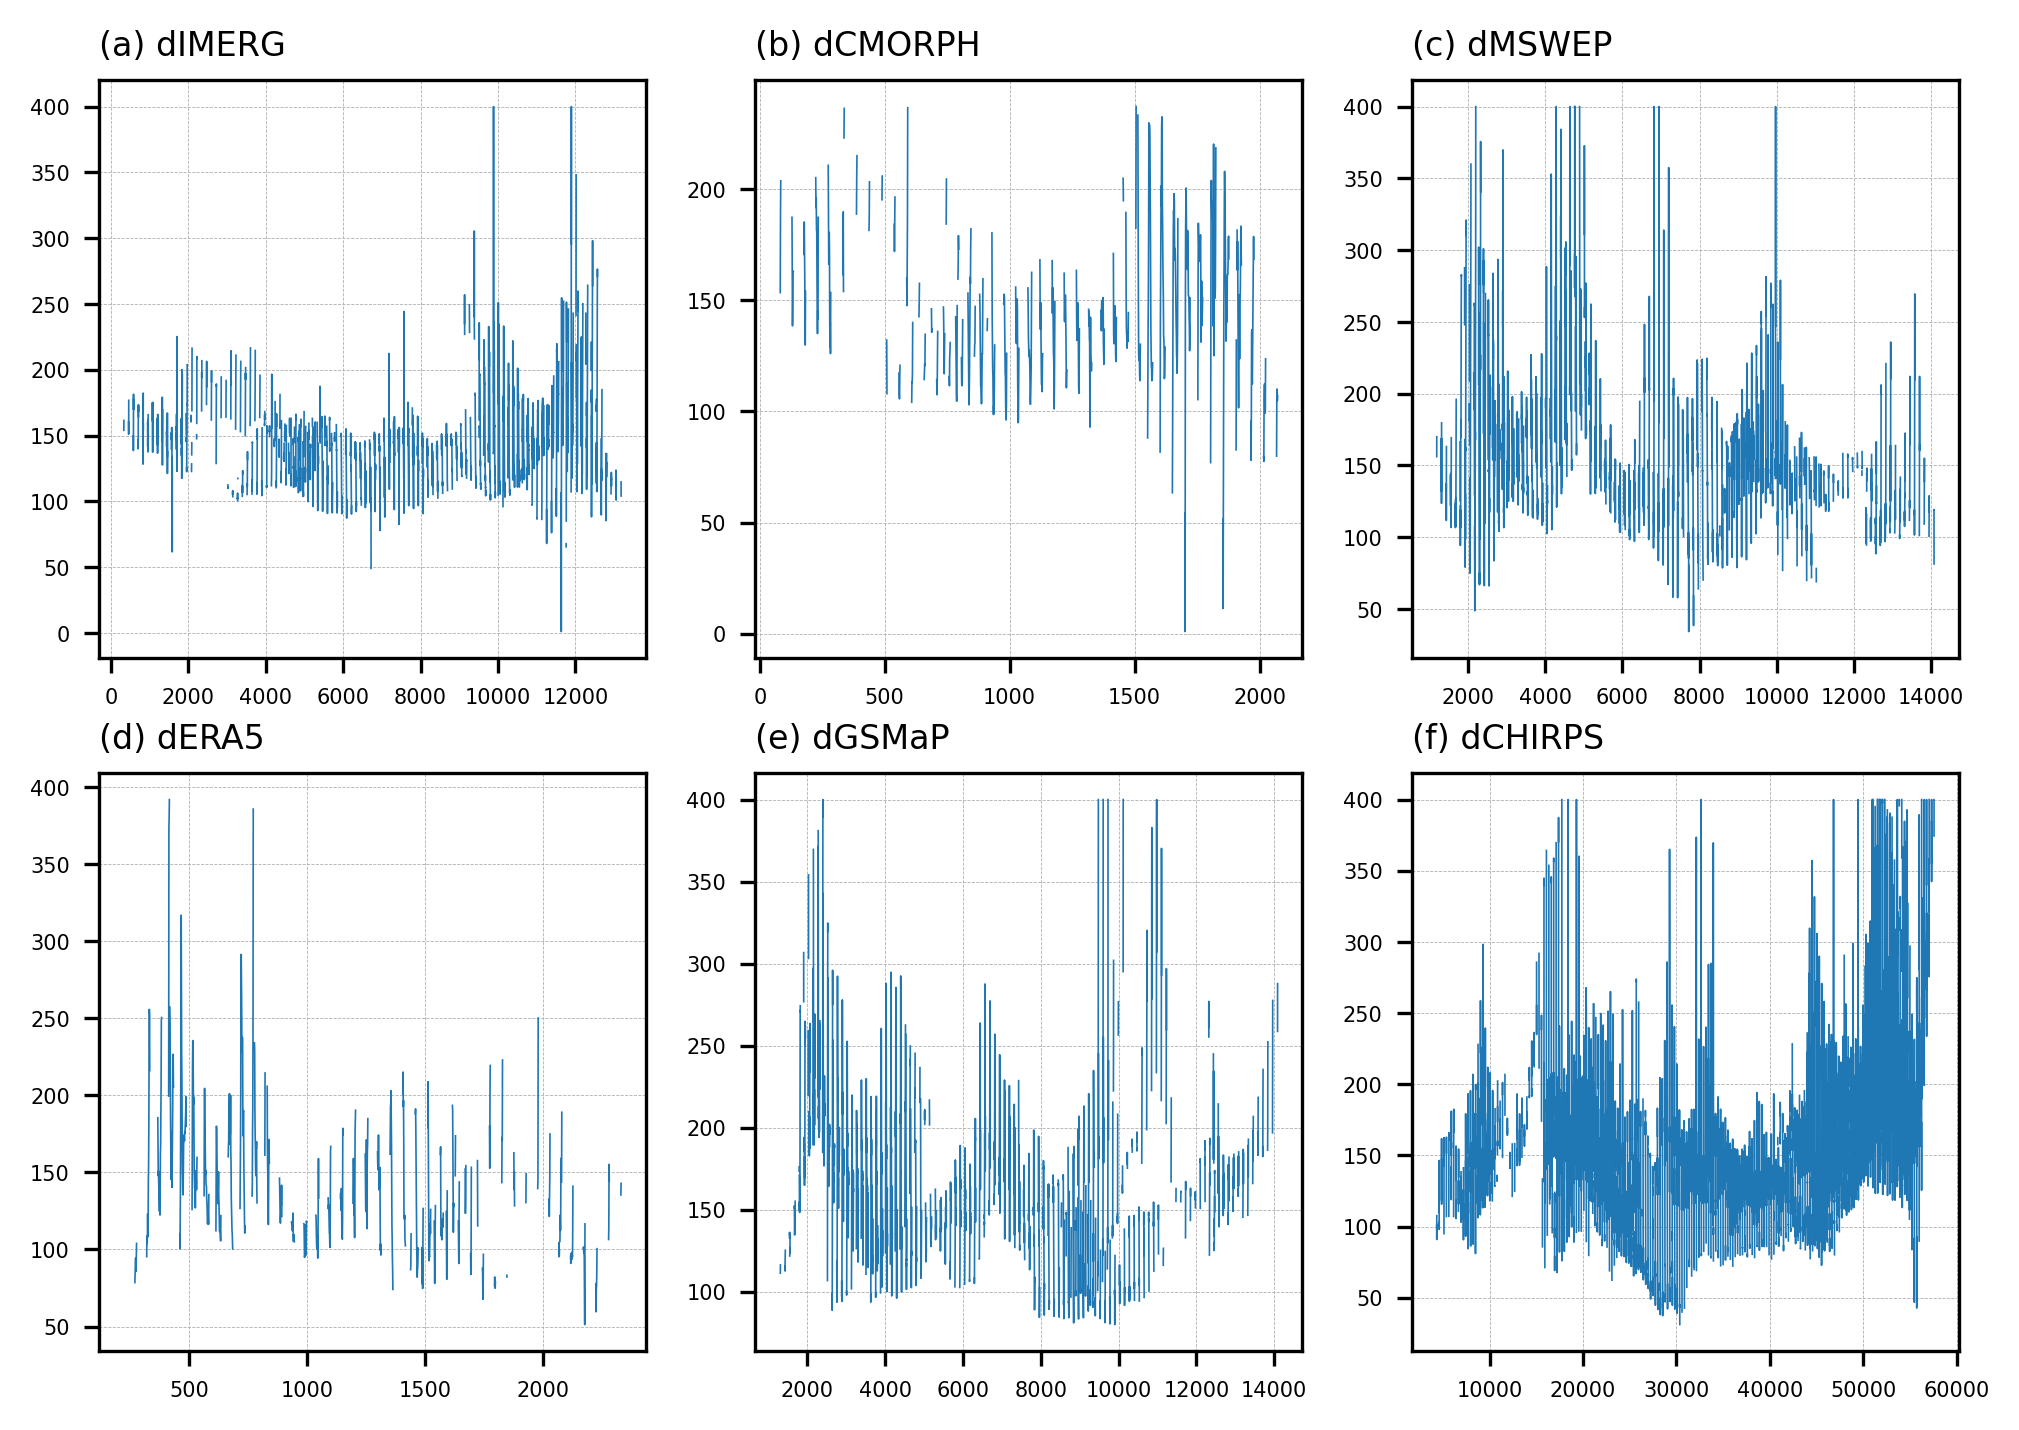

In [21]:
fonttitle = 8

fig = plt.figure(figsize=(8, 5.5), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol])
        ax.grid(linestyle='--', linewidth=0.2)
        ax.tick_params(axis='both', which='major', labelsize=5)
        axes.append(ax)

a1 = axes[0].plot(Mev_dIMERG.flatten(), linewidth=0.4)
a1 = axes[1].plot(Mev_dCMORPH.flatten(), linewidth=0.4)
a1 = axes[2].plot(Mev_dMSWEP.flatten(), linewidth=0.4)
a1 = axes[3].plot(Mev_dERA5.flatten(), linewidth=0.4)
a1 = axes[4].plot(Mev_dGSMaP.flatten(), linewidth=0.4)
a1 = axes[5].plot(Mev_dCHIRPS.flatten(), linewidth=0.4)

axes[0].set_title('(a) dIMERG', fontsize=fonttitle, loc='left')
axes[1].set_title('(b) dCMORPH', fontsize=fonttitle, loc='left')
axes[2].set_title('(c) dMSWEP', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS', fontsize=fonttitle, loc='left')

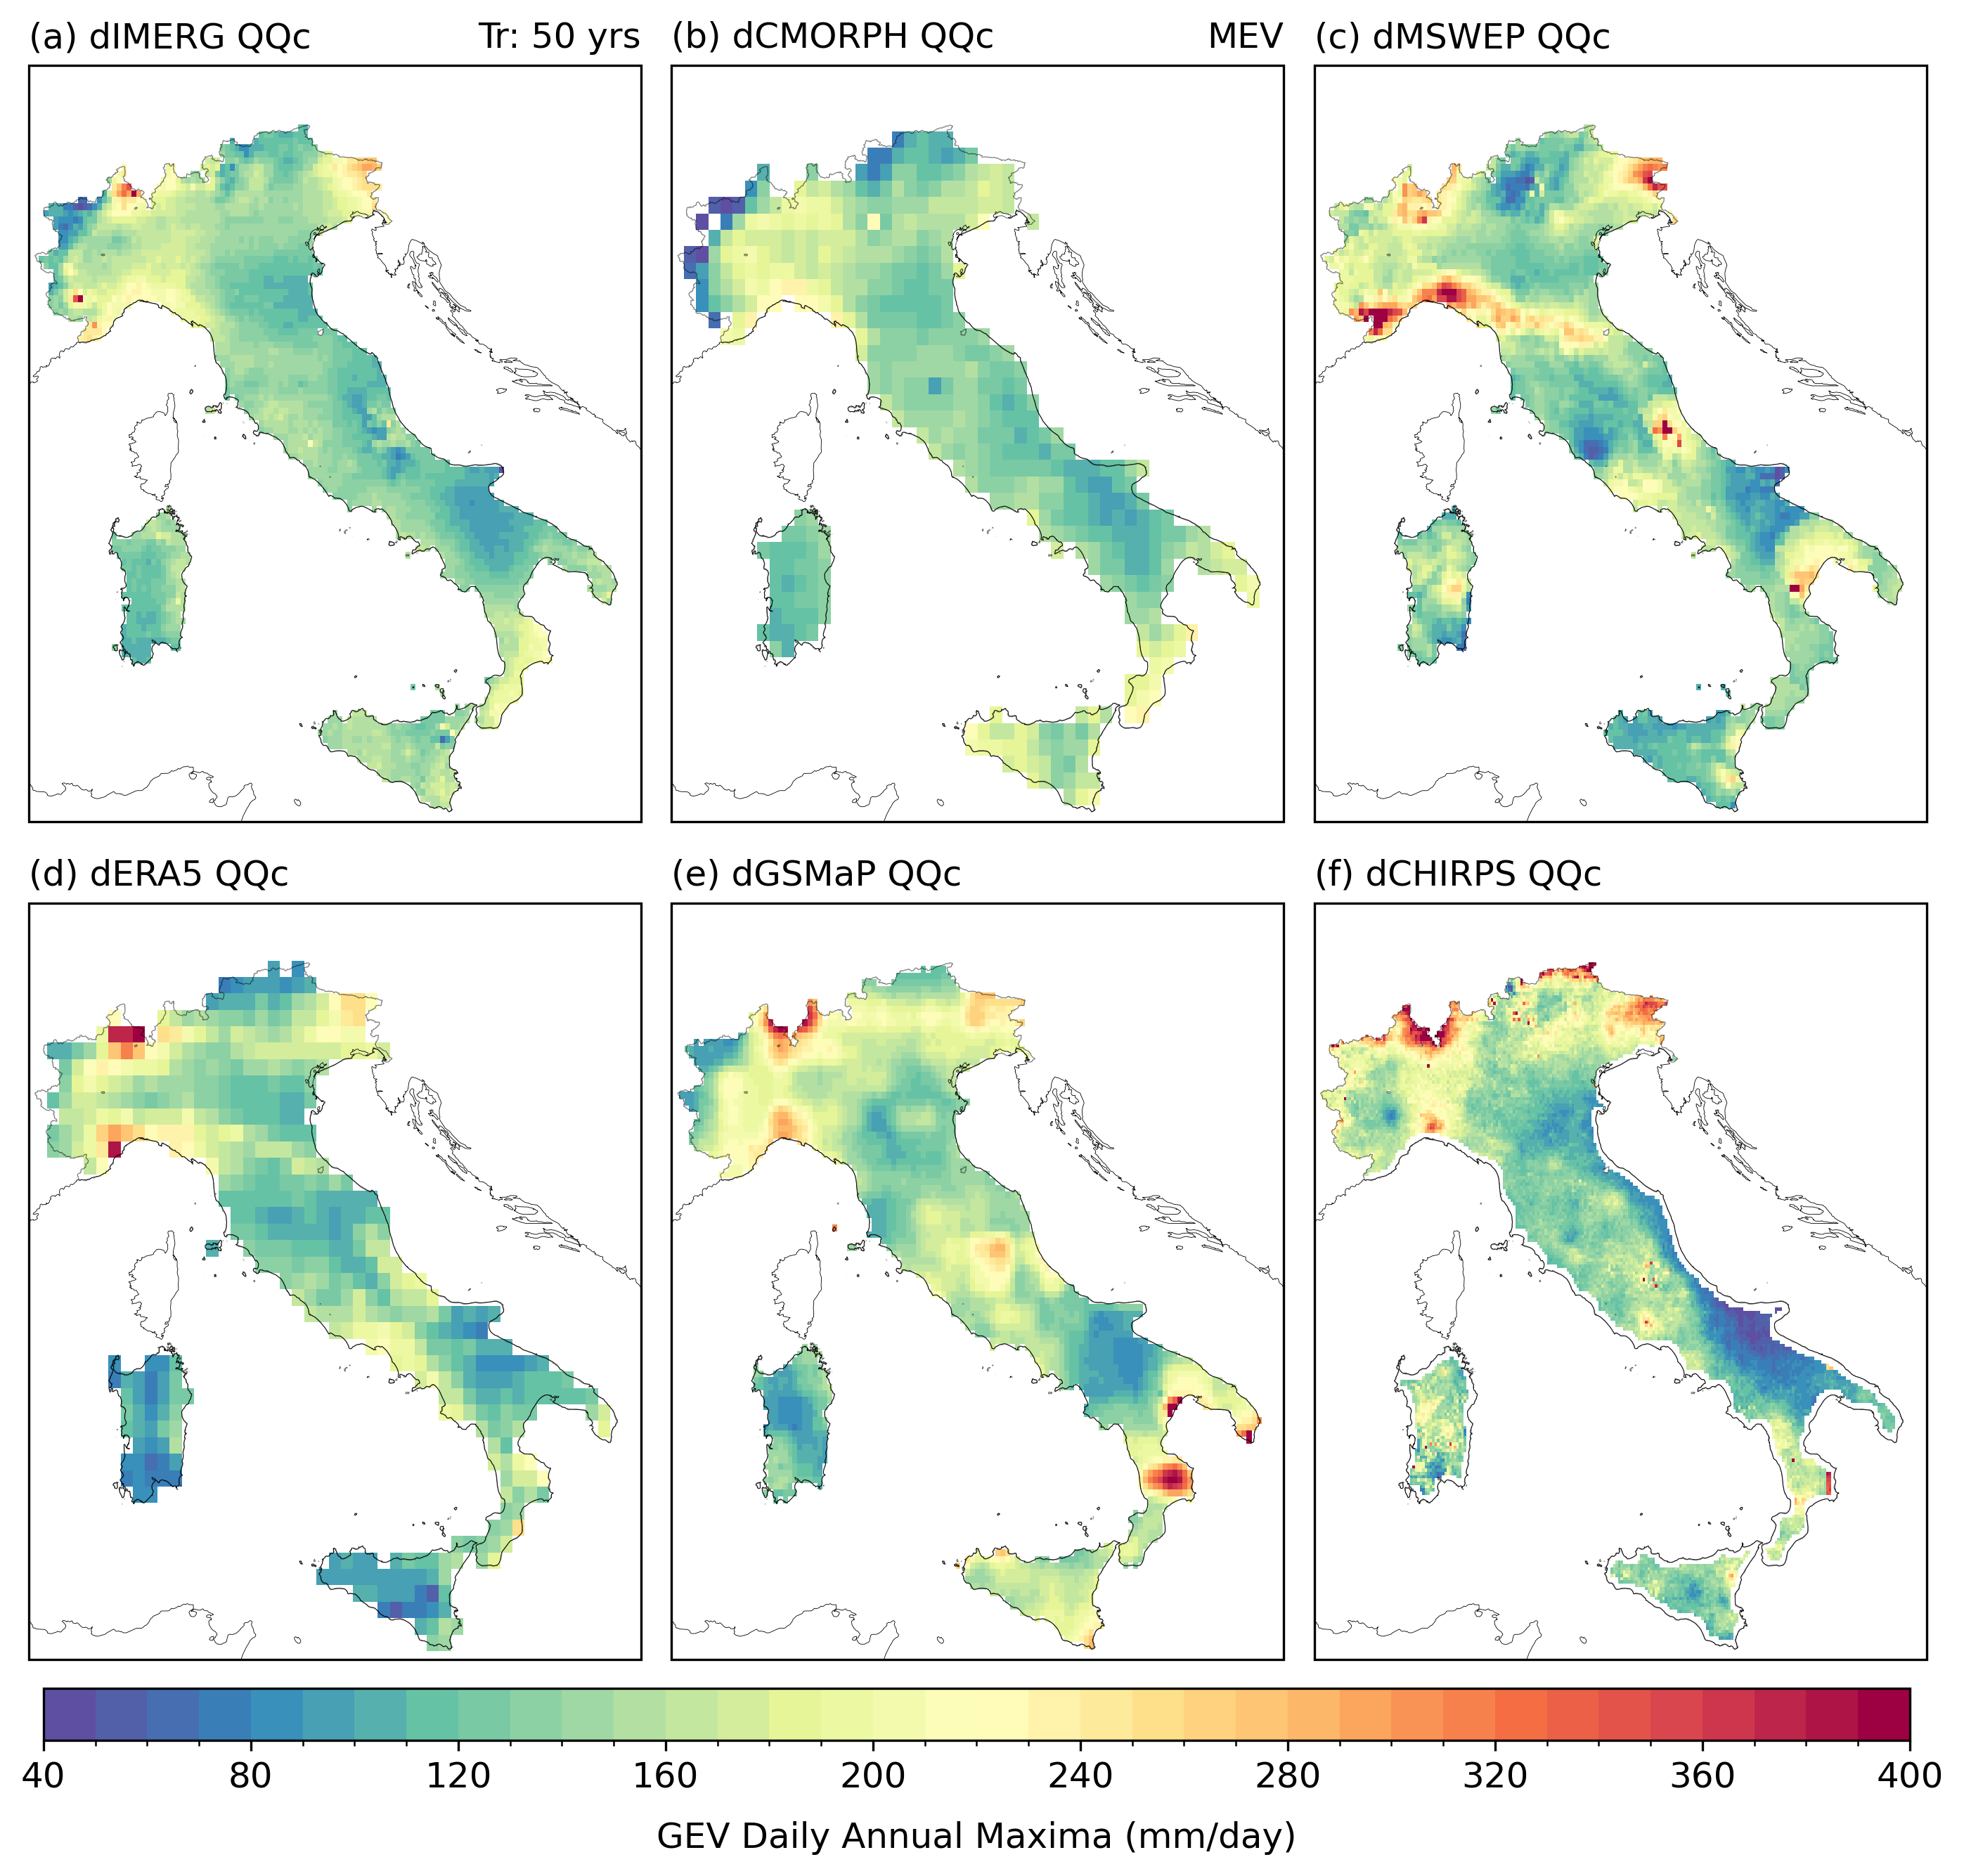

In [34]:
fonttitle = 12

GEV_cmap = plt.cm.Spectral_r
GEV_levels = np.arange(40,410,10)

GEV_norm = mcolors.BoundaryNorm(boundaries=GEV_levels, ncolors=GEV_cmap.N)
# GEV_norm = None

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 8.5), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        # DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=15, alpha=0.6)
        ITALY.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.3, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.2)
        axes.append(ax)

a1 = axes[0].pcolormesh(lon2dIM, lat2dIM, Mev_dIMERG, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[0], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[1].pcolormesh(lon2dCM, lat2dCM, Mev_dCMORPH, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[1], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[2].pcolormesh(lon2dMS, lat2dMS, Mev_dMSWEP, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[3], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[3].pcolormesh(lon2dER, lat2dER, Mev_dERA5, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[2], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[4].pcolormesh(lon2dGS, lat2dGS, Mev_dGSMaP, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[4], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

a1 = axes[5].pcolormesh(lon2dCH, lat2dCH, Mev_dCHIRPS, cmap=GEV_cmap, norm=GEV_norm)
# cbar = plt.colorbar(a1, ax=axes[5], fraction=0.056, pad=0.04)
# cbar.ax.tick_params(labelsize=6)

axes[0].set_title('(a) dIMERG QQc', fontsize=fonttitle, loc='left')
axes[0].set_title(f'Tr: {Tr[pos]} yrs', fontsize=fonttitle, loc='right')
axes[1].set_title('(b) dCMORPH QQc', fontsize=fonttitle, loc='left')
axes[1].set_title(f'MEV', fontsize=fonttitle, loc='right')
axes[2].set_title('(c) dMSWEP QQc', fontsize=fonttitle, loc='left')
axes[3].set_title('(d) dERA5 QQc', fontsize=fonttitle, loc='left')
axes[4].set_title('(e) dGSMaP QQc', fontsize=fonttitle, loc='left')
axes[5].set_title('(f) dCHIRPS QQc', fontsize=fonttitle, loc='left')

# ================================================================================================================================
cbar_ax = fig.add_axes([0.057, 0.01, 0.885, 0.029]) # Horizontal
cbar = fig.colorbar(a1, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label("GEV Daily Annual Maxima (mm/day)", fontsize=12, labelpad=9)

# ================================================================================================================================
# ================================================================================================================================

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0.08)